<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/NVL_RNN_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [166]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [167]:
# 2. Đọc file csv
df = pd.read_csv('NVL-Data.csv')
df

,Date,Price
0,2017-01-03,25055.00
1,2017-01-04,25225.00
2,2017-01-05,25097.00
3,2017-01-06,25140.00
4,2017-01-07,25129.25
...,...,...
2702,2024-05-28,14500.00
2703,2024-05-29,14150.00
2704,2024-05-30,14150.00
2705,2024-05-31,14450.00


In [168]:
df1=df.reset_index()['Price']

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [170]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [171]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [172]:
test_data

array([[0.80727264],
       [0.80727264],
       [0.80678552],
       [0.80800331],
       [0.81774563],
       [0.80800331],
       [0.81409226],
       [0.81092601],
       [0.81092601],
       [0.8786351 ],
       [0.89933752],
       [0.89568415],
       [0.88350626],
       [0.89324858],
       [0.89008232],
       [0.89008232],
       [0.87985289],
       [0.87985289],
       [0.84940815],
       [0.85062594],
       [0.88107068],
       [0.86816211],
       [0.86816211],
       [0.92856447],
       [0.94317794],
       [0.92612889],
       [0.90542647],
       [0.91516879],
       [0.92369331],
       [0.92369331],
       [0.91212431],
       [0.91029763],
       [0.92856447],
       [0.91029763],
       [0.89933752],
       [0.91212431],
       [0.91212431],
       [0.87619952],
       [0.87376394],
       [0.86645721],
       [0.85062594],
       [0.86158605],
       [0.86572653],
       [0.86572653],
       [0.85062594],
       [0.86158605],
       [0.86523942],
       [0.870

In [173]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [174]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [175]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [176]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [177]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 3s 51ms/step - loss: 0.0017 - val_loss: 5.8822e-04
Epoch 2/100
29/29 [==============================] - 1s 37ms/step - loss: 2.4813e-04 - val_loss: 5.2227e-04
Epoch 3/100
29/29 [==============================] - 1s 22ms/step - loss: 2.0975e-04 - val_loss: 4.7643e-04
Epoch 4/100
29/29 [==============================] - 1s 22ms/step - loss: 2.0383e-04 - val_loss: 4.7141e-04
Epoch 5/100
29/29 [==============================] - 1s 23ms/step - loss: 2.0112e-04 - val_loss: 4.2896e-04
Epoch 6/100
29/29 [==============================] - 1s 23ms/step - loss: 1.9015e-04 - val_loss: 4.8428e-04
Epoch 7/100
29/29 [==============================] - 1s 23ms/step - loss: 1.9807e-04 - val_loss: 5.5100e-04
Epoch 8/100
29/29 [==============================] - 1s 23ms/step - loss: 3.2298e-04 - val_loss: 3.9992e-04
Epoch 9/100
29/29 [==============================] - 1s 22ms/step - loss: 1.8588e-04 - val_loss: 3.9139e-04
Epoch 10/100
29/29 [============

In [178]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

23/23 [==============================] - 0s 13ms/step


In [179]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

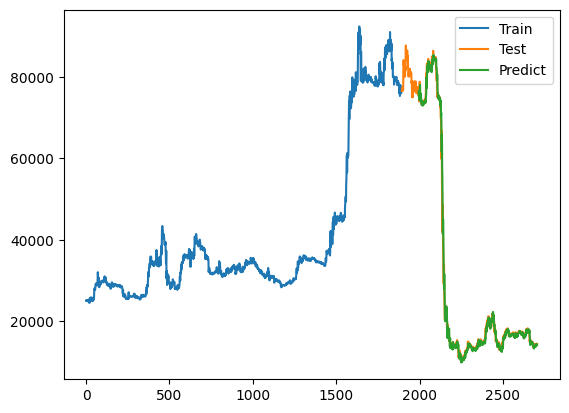

In [180]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [181]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [182]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 1073.7004331967241
MAE: 605.8783719563114
MAPE: 0.02630510849852575


In [183]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 23ms/step


In [184]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 23ms/step


In [185]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 23ms/step


In [186]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[13325.08456996],
       [13174.50145419],
       [12941.11633089],
       [12749.65011011],
       [12603.62988731],
       [12397.76773308],
       [11919.36877815],
       [11466.32407214],
       [11147.20055022],
       [10804.09388803],
       [10464.44920158],
       [ 9968.94043044],
       [ 9477.7396179 ],
       [ 9089.45963464],
       [ 8894.9137823 ],
       [ 8532.28492966],
       [ 8173.89226246],
       [ 7847.09356055],
       [ 7416.10084885],
       [ 7125.75328672],
       [ 6883.02457245],
       [ 6478.93353486],
       [ 6024.0547698 ],
       [ 5624.56455752],
       [ 5284.20076269],
       [ 4866.31122595],
       [ 4475.79598799],
       [ 4008.22793871],
       [ 3527.55487904],
       [ 3067.49314967]])

In [187]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


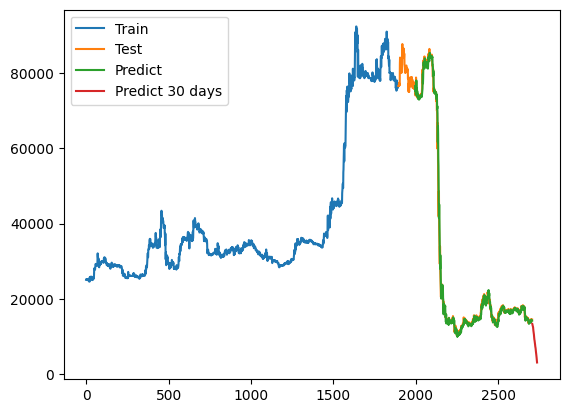

In [188]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



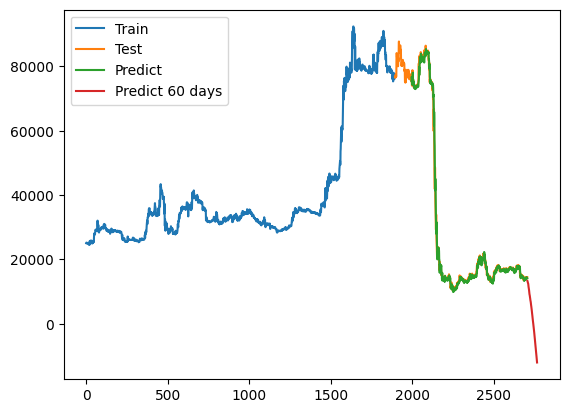

In [189]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



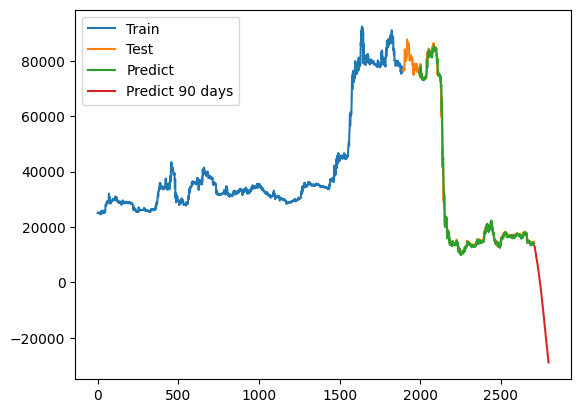

In [190]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

